In [84]:
import pandas as pd

In [85]:
df = pd.read_csv("all_stocks_5yr.csv", parse_dates = ["date"])
df.rename(columns = {"Name":"name"},inplace = True)
df["name"] = df["name"].astype('category')
df["year"] = df["date"].dt.year
df["month name"] = df["date"].dt.month_name()
df["day"] = df["date"].dt.day_name()
df = df[["name", "date","year","month name","day","open","high",'low',"close","volume"]]
df.head(3)

,name,date,year,month name,day,open,high,low,close,volume
0,AAL,2013-02-08,2013,February,Friday,15.07,15.12,14.63,14.75,8407500
1,AAL,2013-02-11,2013,February,Monday,14.89,15.01,14.26,14.46,8882000
2,AAL,2013-02-12,2013,February,Tuesday,14.45,14.51,14.10,14.27,8126000


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   name        619040 non-null  category      
 1   date        619040 non-null  datetime64[ns]
 2   year        619040 non-null  int64         
 3   month name  619040 non-null  object        
 4   day         619040 non-null  object        
 5   open        619029 non-null  float64       
 6   high        619032 non-null  float64       
 7   low         619032 non-null  float64       
 8   close       619040 non-null  float64       
 9   volume      619040 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 43.7+ MB


In [87]:
df.isnull().sum() # null values

name           0
date           0
year           0
month name     0
day            0
open          11
high           8
low            8
close          0
volume         0
dtype: int64

In [88]:
stock_groupby_name = df.groupby('name')
stock_groupby_name.get_group("AAL")

,name,date,year,month name,day,open,high,low,close,volume
0,AAL,2013-02-08,2013,February,Friday,15.07,15.12,14.63,14.75,8407500
1,AAL,2013-02-11,2013,February,Monday,14.89,15.01,14.26,14.46,8882000
2,AAL,2013-02-12,2013,February,Tuesday,14.45,14.51,14.10,14.27,8126000
3,AAL,2013-02-13,2013,February,Wednesday,14.30,14.94,14.25,14.66,10259500
4,AAL,2013-02-14,2013,February,Thursday,14.94,14.96,13.16,13.99,31879900
...,...,...,...,...,...,...,...,...,...,...
1254,AAL,2018-02-01,2018,February,Thursday,54.00,54.64,53.59,53.88,3623078
1255,AAL,2018-02-02,2018,February,Friday,53.49,53.99,52.03,52.10,5109361
1256,AAL,2018-02-05,2018,February,Monday,51.99,52.39,49.75,49.76,6878284
1257,AAL,2018-02-06,2018,February,Tuesday,49.32,51.50,48.79,51.18,6782480


In [89]:
stock_groupby_name.size()

name
A       1259
AAL     1259
AAP     1259
AAPL    1259
ABBV    1259
        ... 
XYL     1259
YUM     1259
ZBH     1259
ZION    1259
ZTS     1259
Length: 505, dtype: int64

In [90]:
stock_groupby_name.get_group("AAL")["open"].mean()

38.390495472597294

In [91]:
stock_groupby_name.mean()

C:\Users\user\AppData\Local\Temp\ipykernel_5540\1805961196.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stock_groupby_name.mean()


,year,open,high,low,close,volume
name,,,,,,
A,2015.101668,49.187863,49.600059,48.782026,49.202025,2.338039e+06
AAL,2015.101668,38.390495,38.955554,37.825605,38.393252,9.390321e+06
AAP,2015.101668,132.439631,133.818297,131.036025,132.433463,1.078043e+06
AAPL,2015.101668,109.055429,109.951118,108.141589,109.066698,5.404790e+07
ABBV,2015.101668,60.802801,61.474133,60.177275,60.864440,7.870683e+06
...,...,...,...,...,...,...
XYL,2015.101668,41.415473,41.763885,41.076026,41.434095,1.183141e+06
YUM,2015.101668,75.422099,76.027123,74.844914,75.451009,3.209032e+06
ZBH,2015.101668,105.542014,106.419854,104.698038,105.606291,1.297144e+06


In [92]:
stock_groupby_name["open",'high','low','close','volume'].mean()  # mean 

C:\Users\user\AppData\Local\Temp\ipykernel_5540\855110001.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stock_groupby_name["open",'high','low','close','volume'].mean()  # mean


,open,high,low,close,volume
name,,,,,
A,49.187863,49.600059,48.782026,49.202025,2.338039e+06
AAL,38.390495,38.955554,37.825605,38.393252,9.390321e+06
AAP,132.439631,133.818297,131.036025,132.433463,1.078043e+06
AAPL,109.055429,109.951118,108.141589,109.066698,5.404790e+07
ABBV,60.802801,61.474133,60.177275,60.864440,7.870683e+06
...,...,...,...,...,...
XYL,41.415473,41.763885,41.076026,41.434095,1.183141e+06
YUM,75.422099,76.027123,74.844914,75.451009,3.209032e+06
ZBH,105.542014,106.419854,104.698038,105.606291,1.297144e+06


In [93]:
stock_groupby_name["open",'high','low','close','volume'].max() # max

C:\Users\user\AppData\Local\Temp\ipykernel_5540\2056005274.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stock_groupby_name["open",'high','low','close','volume'].max() # max


,open,high,low,close,volume
name,,,,,
A,74.48,75.00,74.30,74.82,18146408
AAL,58.79,59.08,57.80,58.47,137767165
AAP,201.24,201.24,198.16,200.38,19749515
AAPL,179.37,180.10,178.25,179.26,266833581
ABBV,121.50,125.86,118.98,123.21,122740856
...,...,...,...,...,...
XYL,75.22,76.81,74.65,75.66,10022418
YUM,94.95,95.90,94.15,94.88,36795550
ZBH,132.51,133.49,131.90,133.09,12394537


In [94]:
stock_groupby_name["open",'high','low','close','volume'].min() # min

C:\Users\user\AppData\Local\Temp\ipykernel_5540\1780527944.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stock_groupby_name["open",'high','low','close','volume'].min() # min


,open,high,low,close,volume
name,,,,,
A,33.1800,34.0600,33.1150,33.3700,532863
AAL,13.1400,13.4200,12.7000,13.0200,1352400
AAP,76.0400,76.6600,75.6230,76.1800,130712
AAPL,55.4242,57.0857,55.0142,55.7899,11475922
ABBV,35.0500,35.5700,35.0100,35.2700,1747000
...,...,...,...,...,...
XYL,24.2000,24.4800,23.6100,24.1900,195883
YUM,59.8900,60.2500,59.5700,59.7000,666705
ZBH,72.5900,73.3500,72.2400,72.3800,233450


In [95]:
stock_groupby_name["open",'high','low','close','volume'].agg(["mean", "max", "min"])

C:\Users\user\AppData\Local\Temp\ipykernel_5540\1338707387.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stock_groupby_name["open",'high','low','close','volume'].agg(["mean", "max", "min"])


open                         high                          low  \
            mean     max      min        mean     max      min        mean   
name                                                                         
A      49.187863   74.48  33.1800   49.600059   75.00  34.0600   48.782026   
AAL    38.390495   58.79  13.1400   38.955554   59.08  13.4200   37.825605   
AAP   132.439631  201.24  76.0400  133.818297  201.24  76.6600  131.036025   
AAPL  109.055429  179.37  55.4242  109.951118  180.10  57.0857  108.141589   
ABBV   60.802801  121.50  35.0500   61.474133  125.86  35.5700   60.177275   
...          ...     ...      ...         ...     ...      ...         ...   
XYL    41.415473   75.22  24.2000   41.763885   76.81  24.4800   41.076026   
YUM    75.422099   94.95  59.8900   76.027123   95.90  60.2500   74.844914   
ZBH   105.542014  132.51  72.5900  106.419854  133.49  73.3500  104.698038   
ZION   32.161477   54.77  20.1000   32.509290   55.61  20.2300   31.802241   
ZTS    45.091389   79.81  28.4800   45.488826   80.13  28.5700   44.665588   

                            close                         volume             \
         max      min        mean     max      min          mean        max   
name                                                                          
A      74.30  33.1150   49.202025   74.82  33.3700  2.338039e+06   18146408   
AAL    57.80  12.7000   38.393252   58.47  13.0200  9.390321e+06  137767165   
AAP   198.16  75.6230  132.433463  200.38  76.1800  1.078043e+06   19749515   
AAPL  178.25  55.0142  109.066698  179.26  55.7899  5.404790e+07  266833581   
ABBV  118.98  35.0100   60.864440  123.21  35.2700  7.870683e+06  122740856   
...      ...      ...         ...     ...      ...           ...        ...   
XYL    74.65  23.6100   41.434095   75.66  24.1900  1.183141e+06   10022418   
YUM    94.15  59.5700   75.451009   94.88  59.7000  3.209032e+06   36795550   
ZBH   131.90  72.2400  105.606291  133.09  72.3800  1.297144e+06   12394537   
ZION   53.98  19.6500   32.171790   54.98  19.9000  2.621178e+06   15681067   
ZTS    79.38  28.1350   45.098648   80.09  28.4000  3.681878e+06   39627562   

                
           min  
name            
A       532863  
AAL    1352400  
AAP     130712  
AAPL  11475922  
ABBV   1747000  
...        ...  
XYL     195883  
YUM     666705  
ZBH     233450  
ZION    425729  
ZTS     438632  

[505 rows x 15 columns]

In [96]:
stock_groupby_name_year = df.groupby(["name","year"])
stock_groupby_name_year.size()

name  year
A     2013    226
      2014    252
      2015    252
      2016    252
      2017    251
             ... 
ZTS   2014    252
      2015    252
      2016    252
      2017    251
      2018     26
Length: 3030, dtype: int64

In [97]:
stock_groupby_name_year["open",'high','low','close','volume'].mean()  # mean 

C:\Users\user\AppData\Local\Temp\ipykernel_5540\2576055608.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stock_groupby_name_year["open",'high','low','close','volume'].mean()  # mean


open       high        low      close        volume
name year                                                          
A    2013  47.079690  47.520217  46.694402  47.104823  3.030077e+06
     2014  54.123056  54.578355  53.637273  54.119802  2.272998e+06
     2015  39.590833  39.941183  39.234304  39.602143  2.560840e+06
     2016  43.338492  43.731210  42.970086  43.369960  2.083182e+06
     2017  59.330558  59.731322  58.922418  59.339641  1.849346e+06
...              ...        ...        ...        ...           ...
ZTS  2014  34.028567  34.325801  33.747287  34.063405  4.028968e+06
     2015  46.127460  46.610730  45.560357  46.101310  3.452446e+06
     2016  47.825098  48.242964  47.353975  47.833968  3.761415e+06
     2017  61.065797  61.508155  60.699779  61.129442  2.694186e+06
     2018  75.771154  76.456069  75.138296  75.800769  2.946851e+06

[3030 rows x 5 columns]

In [98]:
stock_groupby_name_year["open",'high','low','close','volume'].max()  # max

C:\Users\user\AppData\Local\Temp\ipykernel_5540\2136397535.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stock_groupby_name_year["open",'high','low','close','volume'].max()  # max


open   high    low  close      volume
name year                                        
A    2013  57.57  57.94  57.24  57.89  18146408.0
     2014  60.83  61.22  60.71  60.93  17862776.0
     2015  43.59  43.59  43.18  43.55   9007218.0
     2016  48.63  48.63  48.12  48.44   7130371.0
     2017  70.50  70.93  69.42  70.59   7510578.0
...          ...    ...    ...    ...         ...
ZTS  2014  45.20  45.24  44.75  44.93  29137996.0
     2015  53.93  55.38  50.24  55.38  20823304.0
     2016  53.78  54.15  53.65  53.78  12371394.0
     2017  72.97  73.58  72.73  72.80  12881819.0
     2018  79.81  80.13  79.38  80.09   4924323.0

[3030 rows x 5 columns]

In [99]:
stock_groupby_name_year["open",'high','low','close','volume'].min()  # min 

C:\Users\user\AppData\Local\Temp\ipykernel_5540\2854261660.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stock_groupby_name_year["open",'high','low','close','volume'].min()  # min


open     high     low  close     volume
name year                                          
A    2013  40.54  40.9900  40.190  40.52   653055.0
     2014  38.30  39.4800  38.090  38.47   588034.0
     2015  33.18  34.0600  33.115  33.37   834358.0
     2016  34.21  35.6100  34.150  34.80   727682.0
     2017  45.93  46.7500  45.740  46.49   532863.0
...          ...      ...     ...    ...        ...
ZTS  2014  28.48  28.5700  28.135  28.40  1190898.0
     2015  40.30  40.7700  37.730  39.65   928748.0
     2016  38.98  39.5275  38.260  39.33   804749.0
     2017  52.49  52.7550  52.000  52.51   710499.0
     2018  71.77  72.1800  71.340  71.77  1629279.0

[3030 rows x 5 columns]

In [100]:
stock_groupby_name["open",'high','low','close','volume'].agg(["mean", "max", "min"])

C:\Users\user\AppData\Local\Temp\ipykernel_5540\1338707387.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stock_groupby_name["open",'high','low','close','volume'].agg(["mean", "max", "min"])


open                         high                          low  \
            mean     max      min        mean     max      min        mean   
name                                                                         
A      49.187863   74.48  33.1800   49.600059   75.00  34.0600   48.782026   
AAL    38.390495   58.79  13.1400   38.955554   59.08  13.4200   37.825605   
AAP   132.439631  201.24  76.0400  133.818297  201.24  76.6600  131.036025   
AAPL  109.055429  179.37  55.4242  109.951118  180.10  57.0857  108.141589   
ABBV   60.802801  121.50  35.0500   61.474133  125.86  35.5700   60.177275   
...          ...     ...      ...         ...     ...      ...         ...   
XYL    41.415473   75.22  24.2000   41.763885   76.81  24.4800   41.076026   
YUM    75.422099   94.95  59.8900   76.027123   95.90  60.2500   74.844914   
ZBH   105.542014  132.51  72.5900  106.419854  133.49  73.3500  104.698038   
ZION   32.161477   54.77  20.1000   32.509290   55.61  20.2300   31.802241   
ZTS    45.091389   79.81  28.4800   45.488826   80.13  28.5700   44.665588   

                            close                         volume             \
         max      min        mean     max      min          mean        max   
name                                                                          
A      74.30  33.1150   49.202025   74.82  33.3700  2.338039e+06   18146408   
AAL    57.80  12.7000   38.393252   58.47  13.0200  9.390321e+06  137767165   
AAP   198.16  75.6230  132.433463  200.38  76.1800  1.078043e+06   19749515   
AAPL  178.25  55.0142  109.066698  179.26  55.7899  5.404790e+07  266833581   
ABBV  118.98  35.0100   60.864440  123.21  35.2700  7.870683e+06  122740856   
...      ...      ...         ...     ...      ...           ...        ...   
XYL    74.65  23.6100   41.434095   75.66  24.1900  1.183141e+06   10022418   
YUM    94.15  59.5700   75.451009   94.88  59.7000  3.209032e+06   36795550   
ZBH   131.90  72.2400  105.606291  133.09  72.3800  1.297144e+06   12394537   
ZION   53.98  19.6500   32.171790   54.98  19.9000  2.621178e+06   15681067   
ZTS    79.38  28.1350   45.098648   80.09  28.4000  3.681878e+06   39627562   

                
           min  
name            
A       532863  
AAL    1352400  
AAP     130712  
AAPL  11475922  
ABBV   1747000  
...        ...  
XYL     195883  
YUM     666705  
ZBH     233450  
ZION    425729  
ZTS     438632  

[505 rows x 15 columns]

# Analysis of "A" stock

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\user\AppData\Local\Temp\ipykernel_5540\2984211987.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stock_groupby_name_year["open",'high','low','close','volume'].mean().loc["A"].plot(y = ["open",'high','low','close'])


Text(0.5, 1.0, 'Averaeg Stock Price Vs Year')

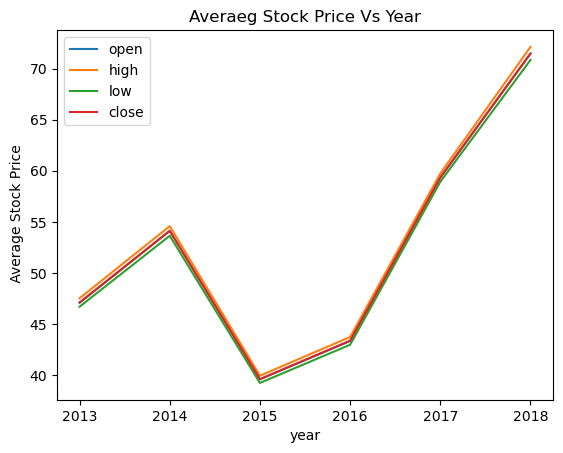

In [102]:
stock_groupby_name_year["open",'high','low','close','volume'].mean().loc["A"].plot(y = ["open",'high','low','close'])
plt.ylabel(" Average Stock Price")
plt.title("Averaeg Stock Price Vs Year")

C:\Users\user\AppData\Local\Temp\ipykernel_5540\4038548130.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stock_groupby_name_year["open",'high','low','close','volume'].mean().loc["A"].plot(y = ["open"])


Text(0.5, 1.0, 'Averaeg Open Price Vs Year')

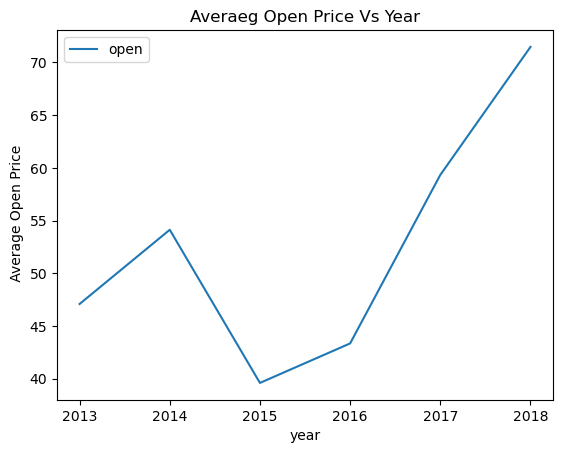

In [103]:
stock_groupby_name_year["open",'high','low','close','volume'].mean().loc["A"].plot(y = ["open"])
plt.ylabel(" Average Open Price")
plt.title("Averaeg Open Price Vs Year")

C:\Users\user\AppData\Local\Temp\ipykernel_5540\1906116404.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stock_groupby_name_year["open",'high','low','close','volume'].mean().loc["A"].plot(y = ["volume"])


Text(0.5, 1.0, 'Averaeg Volume Vs Year')

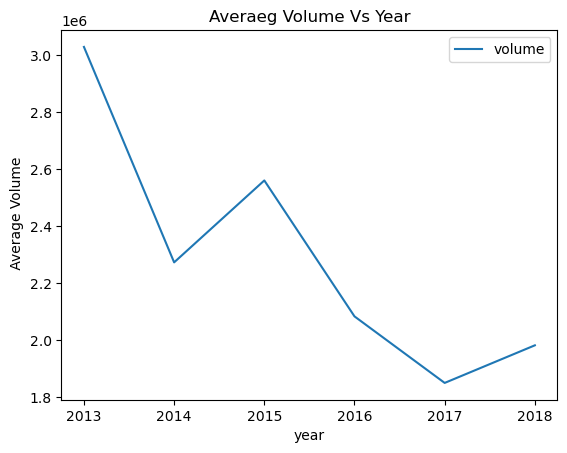

In [104]:
stock_groupby_name_year["open",'high','low','close','volume'].mean().loc["A"].plot(y = ["volume"])
plt.ylabel(" Average Volume")
plt.title("Averaeg Volume Vs Year")